n,mean_diff
<dbl>,<dbl>
30,1.127080e-02
50,5.486304e-03
100,2.015092e-03
200,7.259993e-04
300,3.975448e-04
500,1.855741e-04
1000,6.582749e-05


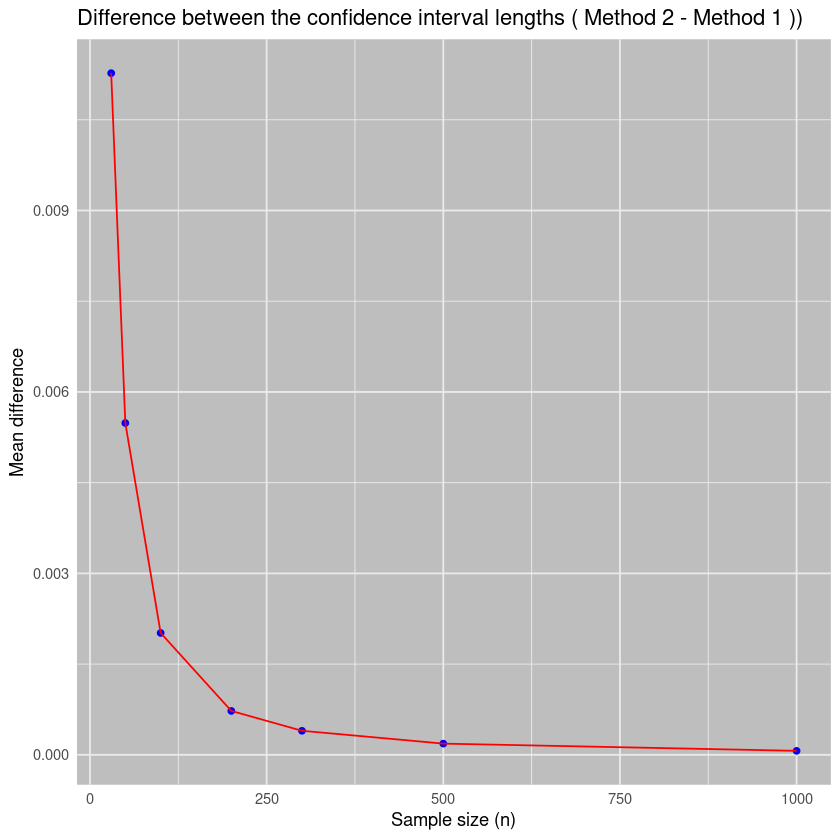

In [45]:

# Imports
library("ggplot2")
library("tidyverse")

# Parameters
set.seed(1584)
ns <- c(30, 50, 100, 200, 300, 500, 1000)
k <- 2500
p <- 0.6
gamma <- 0.9
z <- qnorm((1 + gamma) / 2)

# Function to calculate the difference between the confidence interval lengths
diff_ci_lengths <- function(n, k, p, z) {
  diffs <- numeric(k)
  roots <- matrix(ncol = 2, nrow = k)
  
  for (i in 1:k) {
    sample <- rbinom(n, 1, p)
    sample_mean <- mean(sample)
    
    # Method 1
    a <- 1+z^2/n
    b <- -(2*sample_mean+z^2/n)
    c <- sample_mean^2
    roots <- sort(Re(polyroot(c(c, b, a))))
    ci_length_1 <- roots[2] - roots[1]
    
    # Method 2
    ci_length_2 <- 2 * z * sqrt(sample_mean * (1 - sample_mean) / n)
    
    # Difference between the confidence interval lengths
    diffs[i] <- ci_length_2 - ci_length_1
  }
  
  return(list(mean_diff = mean(diffs), roots = roots))
}

# Calculate the mean differences
results <- data.frame(n = integer(), mean_diff = numeric())

for (n in ns) {
  result <- diff_ci_lengths(n, k, p, z)
  results <- rbind(results, data.frame(n = n, mean_diff = result$mean_diff))
}

results

# Plot of mean differences
ggplot(results, aes(x = n, y = mean_diff)) +
  geom_point(color = "blue") +
  geom_line(color = "red") +
  labs(title = "Difference between the confidence interval lengths ( Method 2 - Method 1 ))",
       x = "Sample size (n)", y = "Mean difference") +
  theme_minimal() + 
  theme(panel.background = element_rect(fill = "gray", colour = NA))
